In [2]:
#Set your project path & file name 
# project_path = '/content/drive/My Drive/ML_Project/Capstone/'
project_path = 'C:\\Users\\Admin\\Desktop\\Shruthi\\SEM 7\\NLP\\NLP-MiniProjects\\'
# file_name ='IT-Ticket-Classification-Copy.csv'

import pandas as pd 
import numpy as np 
import re 
import sys

# print(project_path+file_name)
# , encoding = sys.getfilesystemencoding()

itTicketDF = pd.read_csv('data2.csv')
itTicketDF.head()

callers = itTicketDF['Caller'].unique() 
callers.shape
itTicketDF.drop(["Caller",'Short description'],axis=1,inplace= True)
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8499 non-null   object
 1   Assignment group  8500 non-null   object
dtypes: object(2)
memory usage: 132.9+ KB


In [3]:
targetClassCnt=itTicketDF['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

In [4]:
sample = itTicketDF.groupby(['Assignment group'])
regroup=[]
for grp in itTicketDF['Assignment group'].unique():
    if(sample.get_group(grp).shape[0]<10):
        regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
itTicketDF['Assignment group']=itTicketDF['Assignment group'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Unique Groups check 
itTicketDF['Assignment group'].unique()

Found 25 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/970330466.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


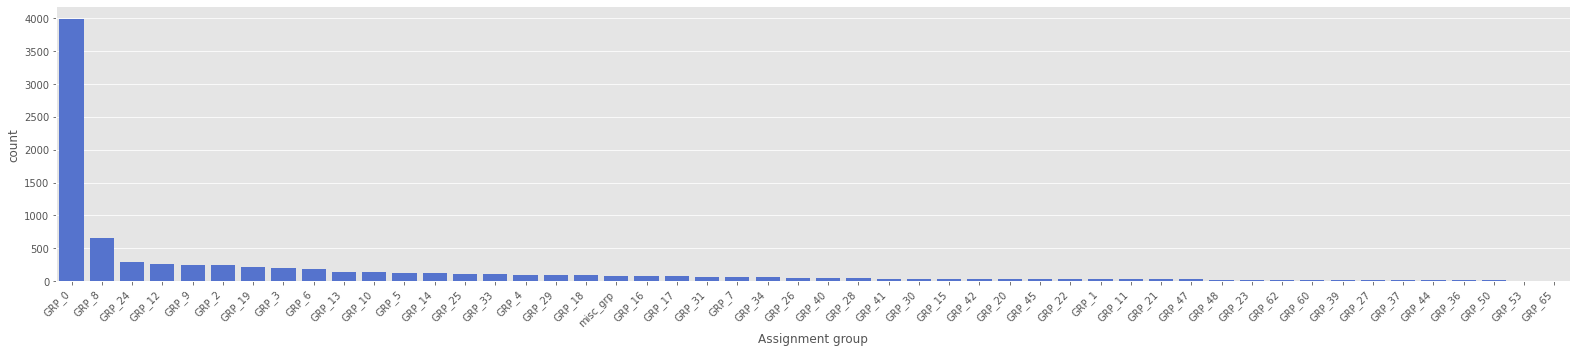

In [7]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = itTicketDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=itTicketDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [8]:
#Fill 'Decsription' field entries that have null with blank space
itTicketDF['Description'].fillna(value=' ', inplace=True)

In [9]:
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
        namelist = [part for part in name.split()]
        for namepart in namelist: 
            text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
itTicketDF['Description'] = itTicketDF['Description'].apply(clean_data)


In [10]:
itTicketDF['length']=[len(text) for text in itTicketDF['Description']]
itTicketDF=itTicketDF[itTicketDF['length']>=3]
itTicketDF['Description'] = itTicketDF['Description'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

#itTicketDF.drop(['length'],axis=1,inplace= True)

C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/215039455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'] = itTicketDF['Description'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))


In [11]:
germanwordlist = ['bitte','nicht','konto','probleme','berechtigung','defekt','mehr','ausgetauscht','rechner', 'drucker','teilweise','freigegeben','genannten','anmeldeaccount',
                  'besprochen','werden','durchwahl','oben','einrichten','zeitwirtschaft','seit','morgens','beheben','keine','zeitbuchungen','vorhanden','dringend','fehler',
                  'werk','anmelde','auftrag','kein','skannen','freundlichen','werkzeuge,','hartstoffe','maste','schutzw','fertigung','immer','sehr','zugriff','freundliche',
                  'geehrter','souzarft','noch','verbindungsherstellung','meldung','erneuten','glich','proben','beilageproben','beilage','auswerten','sinterleitstand','reparar',
                  'reparo','rechner','koenigsee','entregar','atualiza','declara','programdntya','funcionando','preciso','hitacni','grergtger','zugriffsrechte','teamleiter',
                  'abholen','wegen','weit','absender','wenn','abrechnung']
pattern = '|'.join(germanwordlist)

pattern

'bitte|nicht|konto|probleme|berechtigung|defekt|mehr|ausgetauscht|rechner|drucker|teilweise|freigegeben|genannten|anmeldeaccount|besprochen|werden|durchwahl|oben|einrichten|zeitwirtschaft|seit|morgens|beheben|keine|zeitbuchungen|vorhanden|dringend|fehler|werk|anmelde|auftrag|kein|skannen|freundlichen|werkzeuge,|hartstoffe|maste|schutzw|fertigung|immer|sehr|zugriff|freundliche|geehrter|souzarft|noch|verbindungsherstellung|meldung|erneuten|glich|proben|beilageproben|beilage|auswerten|sinterleitstand|reparar|reparo|rechner|koenigsee|entregar|atualiza|declara|programdntya|funcionando|preciso|hitacni|grergtger|zugriffsrechte|teamleiter|abholen|wegen|weit|absender|wenn|abrechnung'

In [12]:
germanDescIndex = itTicketDF[itTicketDF['Description'].str.contains(pattern)].index
germanDescIndex

Int64Index([ 223,  238,  251,  255,  265,  270,  272,  302,  304,  305,
            ...
            8414, 8417, 8419, 8420, 8425, 8427, 8436, 8439, 8467, 8499],
           dtype='int64', length=586)

In [13]:
# since translation done by googletrans & textblob is giving error while using checking & translating every row, just checking the "Description" for german word like 'bitte'

#Install google translator by pip if not installed
!pip install googletrans
from googletrans import Translator

def translateIfRequired(x):
    translator = Translator()
    if translator.detect(x).lang != 'en':
        translatedText = translator.translate(x).text
    else:
        translatedText = x
    return translatedText


In [14]:
for rowId in germanDescIndex:
    itTicketDF['Description'][rowId] = translateIfRequired(itTicketDF['Description'][rowId])

AttributeError: 'NoneType' object has no attribute 'group'

In [15]:
germanDescIndex_new = itTicketDF[itTicketDF['Description'].str.contains(pattern)].index
germanDescIndex_new

Int64Index([ 223,  238,  251,  255,  265,  270,  272,  302,  304,  305,
            ...
            8414, 8417, 8419, 8420, 8425, 8427, 8436, 8439, 8467, 8499],
           dtype='int64', length=586)

In [16]:
itTicketDF['Description'][8232]

'stepfhryhan needs access below collaboration platform links urlaubsplanung file efdl users linnes collaboration platform company inc teamordner linnemann urlaubsplanung file efdl users linnes collaboration platform company inc teamordner linnemann ene allgemeines file efdl users linnes collaboration platform company inc teamordner linnemann allgemeines berirtchtswesen gebiet nord file efdl users linnes collaboration platform company inc teamordner linnemann berirtchtswesen gebiet nord crm teamordner file efdl users linnes collaboration platform company inc teamordner linnemann crm teamordner teamcall teammeeting file efdl users linnes collaboration platform company inc teamordner linnemann teamcall teammeeting top projekte file efdl users linnes collaboration platform company inc teamordner linnemann top projekte hallo sabrthy wie weit sind wir diesem thema habe noch kein ticket erhalten mit freundlichen anwendungstechniker application engineer company deutschland gmbh diese mitteilun

In [17]:
itTicketDF.reset_index(drop=True,inplace=True)

itTicketDF['Description'] = itTicketDF['Description'].str.strip()
itTicketDF['Description'] = itTicketDF['Description'].str.lower()

from collections import OrderedDict
itTicketDF['Description']=itTicketDF['Description'].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8439 entries, 0 to 8438
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8439 non-null   object
 1   Assignment group  8439 non-null   object
 2   length            8439 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 197.9+ KB


C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/27150434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'] = itTicketDF['Description'].str.strip()
C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/27150434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'] = itTicketDF['Description'].str.lower()
C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/27150434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [25]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(itTicketDF['Description']):
    itTicketDF['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!{sys.executable} -m spacy download en_core_web_sm
!pip install -q spacy 
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

itTicketDF['Description'] = itTicketDF['Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/3212114619.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Descri

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/3212114619.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Description'] = itTicketDF['Description'].apply(lemmatize_text)


In [1]:
from platform import python_version
print(python_version())

3.9.6


In [5]:
print(sys.path)

['C:\\Users\\Admin\\Desktop\\Shruthi\\SEM 7\\NLP\\NLP-MiniProjects', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39', '', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Admin\\.ipython']


In [26]:
itTicketDF['Description'][8232]

'abende job scheduler'

### Generate dataset for creating 2 models

<AxesSubplot:xlabel='Assignment group', ylabel='count'>

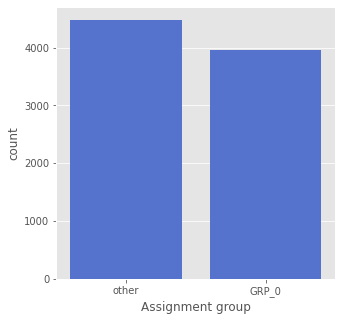

In [27]:
# Create the Dataset for classifying GRP_0
itTicketGRP0DF = itTicketDF.copy()
itTicketGRP0DF['Assignment group']=itTicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = itTicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=itTicketGRP0DF, color='royalblue',order=descending_order)

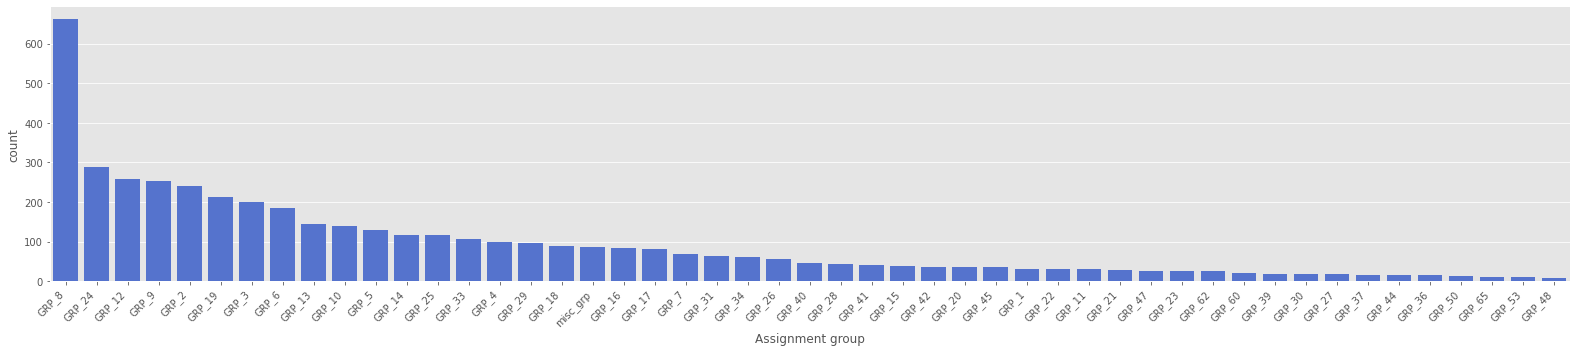

In [28]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = itTicketDF[itTicketDF['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [29]:
maxOthers = itTicketOthersDF['Assignment group'].value_counts().max()
maxOthers

661

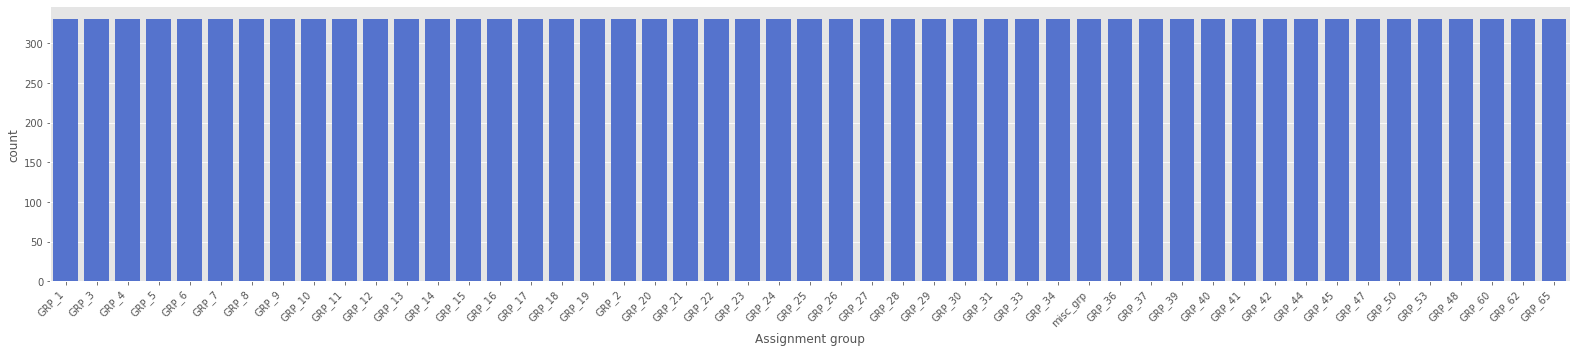

In [30]:
# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample
itTicketOthersDF_resampled = itTicketOthersDF[0:0]
for grp in itTicketOthersDF['Assignment group'].unique():
    itTicketGrpDF = itTicketOthersDF[itTicketOthersDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    itTicketOthersDF_resampled = itTicketOthersDF_resampled.append(resampled)

otherGrpsResampled = pd.concat([itTicketGRP0DF,itTicketOthersDF_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = itTicketOthersDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

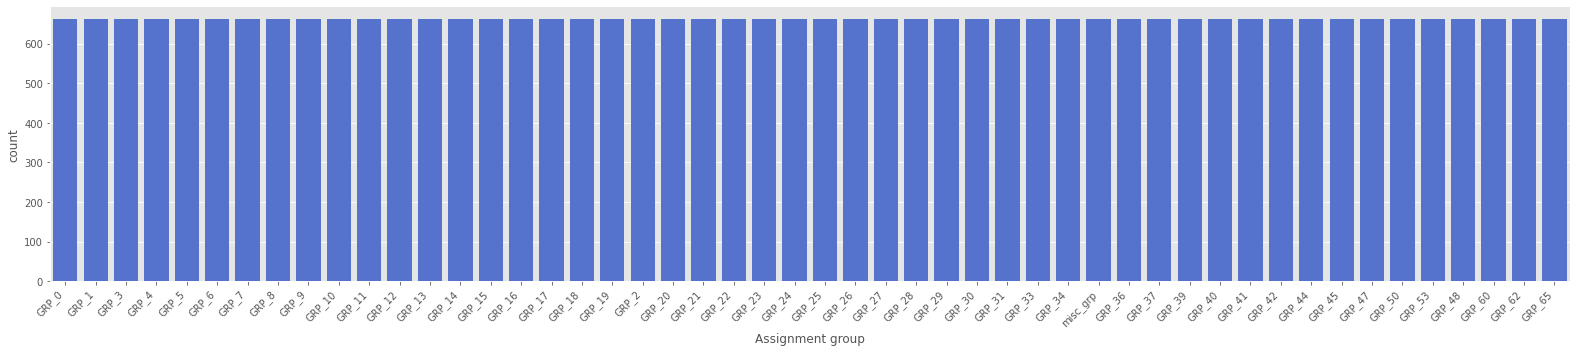

In [31]:
# Treat the imbalnce in the itTicketDF dataset by resampling to 661.This is for us to try creating a single model which use the whiole dataset & verify the performance
itTicketDF_resampled = itTicketDF[0:0]
for grp in itTicketDF['Assignment group'].unique():
    itTicketGrpDF = itTicketDF[itTicketDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    itTicketDF_resampled = itTicketDF_resampled.append(resampled)

descending_order = itTicketDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Label Encoding 'Assignment group' target class

In [32]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
    label_encoder = preprocessing.LabelEncoder() 
    dataframe= label_encoder.fit_transform(dataframe)
    grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
    return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
itTicketDF['Assignment group'],grp_mapping_all_raw = labelencoder(itTicketDF['Assignment group'])

C:\Users\Admin\AppData\Local\Temp/ipykernel_16008/3112070012.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itTicketDF['Assignment group'],grp_mapping_all_raw = labelencoder(itTicketDF['Assignment group'])


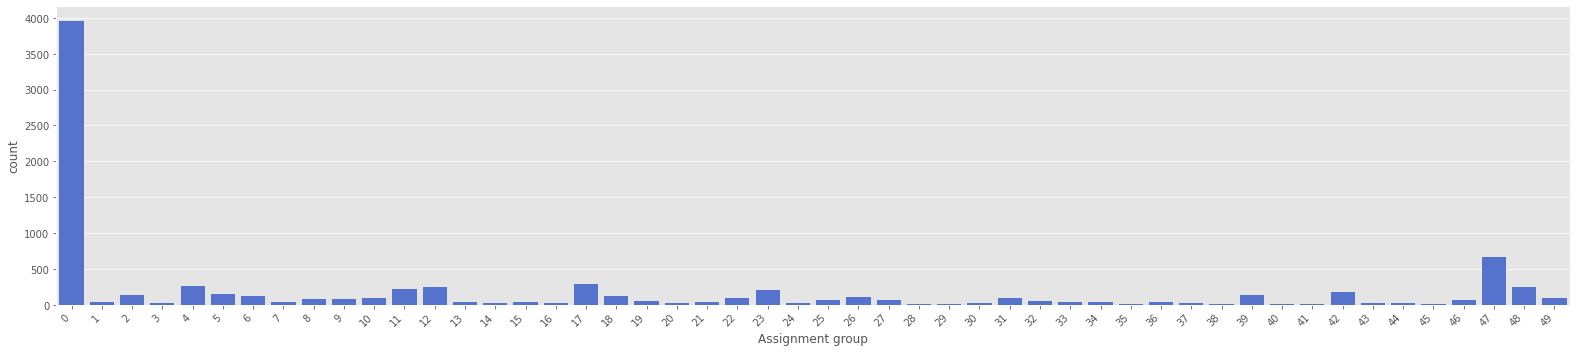

{0: 'GRP_0',
 1: 'GRP_1',
 2: 'GRP_10',
 3: 'GRP_11',
 4: 'GRP_12',
 5: 'GRP_13',
 6: 'GRP_14',
 7: 'GRP_15',
 8: 'GRP_16',
 9: 'GRP_17',
 10: 'GRP_18',
 11: 'GRP_19',
 12: 'GRP_2',
 13: 'GRP_20',
 14: 'GRP_21',
 15: 'GRP_22',
 16: 'GRP_23',
 17: 'GRP_24',
 18: 'GRP_25',
 19: 'GRP_26',
 20: 'GRP_27',
 21: 'GRP_28',
 22: 'GRP_29',
 23: 'GRP_3',
 24: 'GRP_30',
 25: 'GRP_31',
 26: 'GRP_33',
 27: 'GRP_34',
 28: 'GRP_36',
 29: 'GRP_37',
 30: 'GRP_39',
 31: 'GRP_4',
 32: 'GRP_40',
 33: 'GRP_41',
 34: 'GRP_42',
 35: 'GRP_44',
 36: 'GRP_45',
 37: 'GRP_47',
 38: 'GRP_48',
 39: 'GRP_5',
 40: 'GRP_50',
 41: 'GRP_53',
 42: 'GRP_6',
 43: 'GRP_60',
 44: 'GRP_62',
 45: 'GRP_65',
 46: 'GRP_7',
 47: 'GRP_8',
 48: 'GRP_9',
 49: 'misc_grp'}

In [70]:
descending_order = itTicketDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

grp_mapping_all_raw

### Modelling

In [34]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
# Add Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
    if resetData == 1:
        tempResultsDf=pd.DataFrame()
        dataframe=pd.DataFrame()
    else:
        index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
        tempResultsDf= pd.DataFrame(
          {'model':[modelName], 
          'val_accuracy': [acc_value],
          'val_loss':[modelHistory.history['val_loss'][index]],
          'loss':[modelHistory.history['loss'][index]],
          'accuracy':[modelHistory.history['accuracy'][index]],
          'descriptions':[descriptions]},index={str(index_df)})
        dataframe = pd.concat([dataframe,tempResultsDf])
        dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
    return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
    if resetData == 1:
        tempResultsDf=pd.DataFrame()
        dataframe=pd.DataFrame()
    else:
        tempResultsDf= pd.DataFrame(
          {'model':[modelName], 
          'Pred_Accuracy' : [pred_accuracy],
          'descriptions':[descriptions]},index={str(index_df)})
        dataframe = pd.concat([dataframe,tempResultsDf])
        dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
    return dataframe

### Word2Vec Embedding

In [36]:
sentences = [line.split(' ') for line in itTicketDF['Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('word2vec_vector.txt')

In [37]:
# load the whole embedding into memory
embeddings_index = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 10163 word vectors.


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

In [39]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

### LSTM Model

In [75]:
class LstmModel:
    model= Model()
    X_test=[]
    y_test=[]
    embedding_matrix=[]

    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)
        return tokenizer,dataframe

    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
        X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

    def tokenizeAndEmbedding(self,dataframe):
        tokenizer,X = self.wordTokenizer(dataframe['Description'])
        y = np.asarray(dataframe['Assignment group'])
        X = pad_sequences(X, maxlen = maxlen)

        self.embedding_matrix = np.zeros((numWords+1, 100))
        for i,word in tokenizer.index_word.items():
            if i<numWords+1:
                embedding_vector = embeddings_index.get(word)
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        print(self.embedding_matrix.shape)
        return X,y

    def train(self, dataframe, batch_size, epochs):
        X,y = self.tokenizeAndEmbedding(dataframe)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        print(len((pd.Series(y_train)).unique()))
        model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
        return model_history

    def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

        self.model = Model(input_layer,out)
        self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

        self.model.summary()
        plot_model(self.model,to_file="LSTM_Model.jpg")

        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
        return model_history,self.model

    def prediction(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        accuracy = metrics.accuracy_score(self.y_test, pred)
        print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
        return accuracy

    def plotModelAccuracy(self, history, modelname):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])

        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])

        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

In [76]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(itTicketDF,100,epochs)
rawData_accuracy = lstmModelRawData.prediction()

(9001, 100)
Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
50
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               25700     
                                                                 
 de

KeyboardInterrupt: 

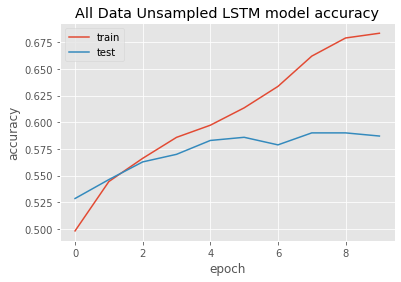

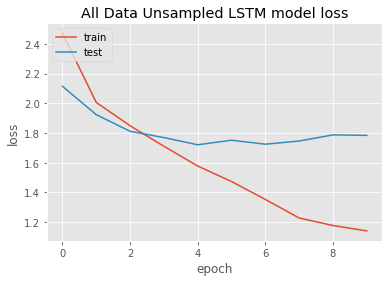

In [42]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [43]:
# Check how the LSTM Model perform with all the data which is cleansed & resampled to 661 to make the target balance
lstmModelAllDataResampled = LstmModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
resampled_accuracy = lstmModelAllDataResampled.prediction()

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25700     
                                                                 
 dense_3 (Dense)

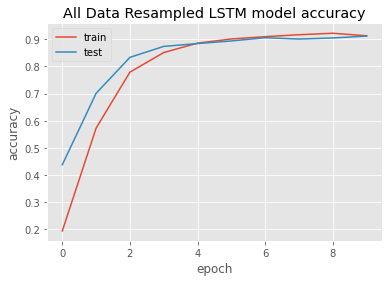

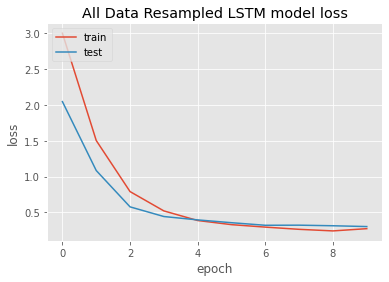

In [44]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled LSTM')

### Dataframe result capture

In [45]:
results=pd.DataFrame()
pred_results = pd.DataFrame()
results=captureData(results,lstmModelRawData_history LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',rawData_accuracy,0)

In [46]:
results=captureData(results,lstmModelAllDataResampled_history,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',resampled_accuracy,0)

### LSTM two part model

In [47]:
class TwoModel:

    model_1 = Model()
    model_2 = Model()
    embedding_matrix=[]

    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)

        self.embedding_matrix = np.zeros((numWords+1, 100))
        for i,word in tokenizer.index_word.items():
            if i<numWords+1:
                embedding_vector = embeddings_index.get(word)
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        return tokenizer,dataframe

    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
        X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, X_test, y_train, y_test, X_Val, y_Val

    def runFirstModel(self,dataframe,epochs):
        grp0_df = dataframe.copy()
        grp0_df['Assignment group']=dataframe['Assignment group'].apply(lambda x : 1 if x != 0  else x)
        tokenizer,X = self.wordTokenizer(grp0_df['Description'])
        y = np.asarray(grp0_df['Assignment group'])
        X = pad_sequences(X, maxlen = maxlen)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        model_history,self.model_1 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
        return model_history,self.model_1

    def runSecondModel(self, dataframe,epochs):
        grpOthers_df = dataframe.copy()
        grpOthers_df = grpOthers_df[grpOthers_df['Assignment group'] != 0]
        grpOthers_df['Assignment group']=grpOthers_df['Assignment group'] - 1
        tokenizer,X = self.wordTokenizer(grpOthers_df['Description'])
        y = np.asarray(grpOthers_df['Assignment group'])
        X = pad_sequences(X, maxlen = maxlen)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        model_history,self.model_2 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
        return model_history,self.model_2

    def modelRunner(self, X,Y,X_Val,Y_Val,epochs):
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(input_dim = numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(Y)).unique()),activation='softmax')(dense)   
        batch_size = 100

        model = Model(input_layer,out)
        model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

        model_history = model.fit(X,Y,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,Y_Val))
        return model_history,model

    def predict(self, X_test):
        predBinary = self.model_1.predict(X_test)
        predBinary = [1 if j>i else 0 for i,j in predBinary]

        new_X_test = pd.DataFrame(X_test)
        new_X_test['grp']=predBinary
        sec_input = new_X_test[new_X_test['grp']!=0]
        sec_input.drop(['grp'],inplace=True, axis=1)
        new_X_test=new_X_test[new_X_test['grp']==0]

        predOther = self.model_2.predict(sec_input)
        predOther = [i.argmax() for i in predOther]
        predOther= [i+1 for i in predOther]
        sec_input['grp']=predOther

        pred_df = pd.concat([new_X_test,sec_input])
        pred_df.sort_index(axis=0,inplace=True)

        return np.array(pred_df['grp'])

    def plotModelAccuracy(self, history, modelname):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])

        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])

        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

In [48]:
model = TwoModel()
model1_history,_ = model.runFirstModel(otherGrpsResampled,5)
model2_history,_ = model.runSecondModel(otherGrpsResampled,20)

tokenizer,X = model.wordTokenizer(otherGrpsResampled['Description'])
y = np.asarray(otherGrpsResampled['Assignment group'])
X = pad_sequences(X, maxlen = maxlen)
_, X_test, _, y_test, _, _ = model.splitData(X,y)

predictions = model.predict(X_test)
twoModel_sampledAccuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy:",twoModel_sampledAccuracy)

Number of Samples: 24609
Number of Labels:  24609
Number of train Samples: 19687
Number of val Samples: 4922
Epoch 1/5
197/197 [==============================] - ETA: 0s - loss: 0.3326 - accuracy: 0.8715
Epoch 00001: val_accuracy improved from -inf to 0.89171, saving model to model-001-0.891711.h5
197/197 [==============================] - 440s 2s/step - loss: 0.3326 - accuracy: 0.8715 - val_loss: 0.2853 - val_accuracy: 0.8917 - lr: 0.0010
Epoch 2/5
197/197 [==============================] - ETA: 0s - loss: 0.2057 - accuracy: 0.9186
Epoch 00002: val_accuracy improved from 0.89171 to 0.92381, saving model to model-002-0.923811.h5
197/197 [==============================] - 461s 2s/step - loss: 0.2057 - accuracy: 0.9186 - val_loss: 0.2141 - val_accuracy: 0.9238 - lr: 0.0010
Epoch 3/5
197/197 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9510
Epoch 00003: val_accuracy improved from 0.92381 to 0.93519, saving model to model-003-0.935189.h5
197/197 [================

KeyboardInterrupt: 

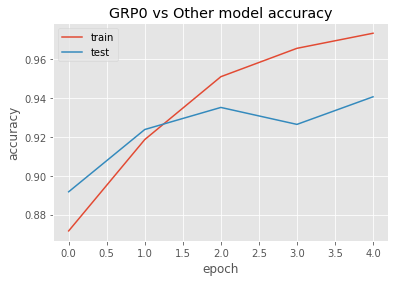

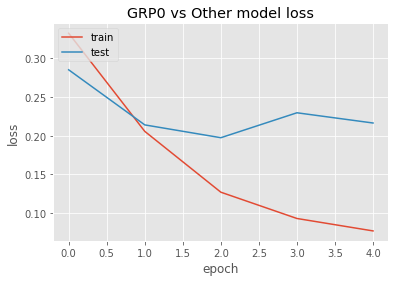

In [49]:
model.plotModelAccuracy(model1_history, 'GRP0 vs Other')
# model.plotModelAccuracy(model2_history, 'Other')

### Dataframe result capture

In [51]:
results=captureData(results,model1_history,'LSTM 2 part model_WV_grp0','LSTM+Word2Vec Embedding on grp0_data','3',0)
# results=captureData(results,model2_history,'LSTM 2 part model_WV_Others','LSTM+Word2Vec Embedding on Rest of groups','4',0)
pred_results= capturePrediction(pred_results,'LSTM 2 part model_WV','LSTM+Word2Vec Embedding on Augmented data','3',twoModel_sampledAccuracy,0)

NameError: name 'twoModel_sampledAccuracy' is not defined

### Glove embedding

In [53]:
EMBEDDING_FILE = 'C:\\Users\\Admin\\Desktop\\Shruthi\\SEM 7\\NLP\\GloVe\\glove.6B.100d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE, encoding='utf_8'):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [54]:
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["collaboration"])))
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["platform"])))

Dimension of the embedding vector is 100
Dimension of the embedding vector is 100


In [55]:
maxlen = 300
numWords = 9000
epochs = 10

### LSTM  with GloVe embeddings

In [56]:
class LstmGloveModel:
    model= Model()
    X_test=[]
    y_test=[]
    embedding_matrix=[]

    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)
        return tokenizer,dataframe

    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
        X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

    def tokenizeAndEmbedding(self,dataframe):
        tokenizer,X = self.wordTokenizer(dataframe['Description'])
        y = np.asarray(dataframe['Assignment group'])
        X = pad_sequences(X, maxlen = maxlen)

        self.embedding_matrix = np.zeros((numWords+1, 100))
        for i,word in tokenizer.index_word.items():
              if i<numWords+1:
                embedding_vector = embeddings_glove.get(word)
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        return X,y

    def train(self, dataframe, batch_size, epochs):
        X,y = self.tokenizeAndEmbedding(dataframe)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
        return model_history

    def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

        self.model = Model(input_layer,out)
        self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
        return model_history,self.model

    def prediction(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        accuracy = metrics.accuracy_score(self.y_test, pred)
        print("Accuracy of the model :",accuracy)
        return accuracy

    def plotModelAccuracy(self, history, modelname):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])

        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])

        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

In [57]:
# Check how the LSTM Model perform with the cleansed data
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmGloveModel()
lstmModelRawData_history, model = lstmModelRawData.train(itTicketDF,100,epochs)
lstm_raw_accuracy = lstmModelRawData.prediction()

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 2.5208 - accuracy: 0.4869
Epoch 00001: val_accuracy improved from -inf to 0.53377, saving model to model-001-0.533768.h5
68/68 [==============================] - 435s 6s/step - loss: 2.5208 - accuracy: 0.4869 - val_loss: 2.0681 - val_accuracy: 0.5338 - lr: 0.0010
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 1.9085 - accuracy: 0.5538 
Epoch 00002: val_accuracy improved from 0.53377 to 0.55746, saving model to model-002-0.557464.h5
68/68 [==============================] - 1169s 17s/step - loss: 1.9085 - accuracy: 0.5538 - val_loss: 1.8776 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 1.7078 - accuracy: 0.5759
Epoch 00003: val_accuracy improved from 0.55746 to 0.57642, saving model to model-003-0.576422.h5
68/68 [=========================

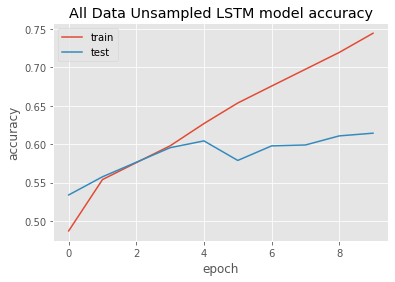

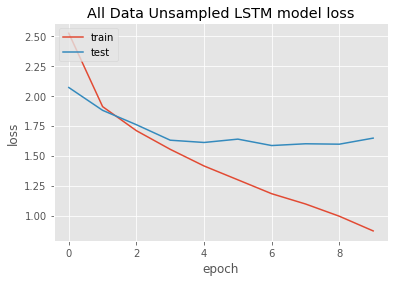

In [58]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [59]:
#Check how the LSTM Model perform with all the data which is cleansed & resampled to 661 to make the target balance
lstmModelAllDataResampled = LstmGloveModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
lstm_allResampled_accuracy = lstmModelAllDataResampled.prediction()

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Epoch 1/10
265/265 [==============================] - ETA: 0s - loss: 2.5659 - accuracy: 0.3304
Epoch 00001: val_accuracy improved from -inf to 0.65855, saving model to model-001-0.658548.h5
265/265 [==============================] - 2701s 10s/step - loss: 2.5659 - accuracy: 0.3304 - val_loss: 1.3380 - val_accuracy: 0.6585 - lr: 0.0010
Epoch 2/10
246/265 [==========================>...] - ETA: 17:12 - loss: 1.0383 - accuracy: 0.7130

KeyboardInterrupt: 

In [ ]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled LSTM')

### Dataframe Result Capture

In [ ]:
results=captureData(results,lstmModelRawData_history,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','5',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','4',lstm_raw_accuracy,0)

In [ ]:
results=captureData(results,lstmModelAllDataResampled_history,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','6',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','5',lstm_allResampled_accuracy,0)

### GRU Model

In [ ]:
class GruGloveModel:
    model= Model()
    X_test=[]
    y_test=[]
    embedding_matrix=[]

    def wordTokenizer(self, dataframe):
        tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
        tokenizer.fit_on_texts(dataframe)
        dataframe = tokenizer.texts_to_sequences(dataframe)
        return tokenizer,dataframe

    def splitData(self,X,y):
        print("Number of Samples:", len(X))
        print("Number of Labels: ", len(y))
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
        X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
        print("Number of train Samples:", len(X_train))
        print("Number of val Samples:", len(X_Val))
        return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

    def tokenizeAndEmbedding(self,dataframe):
        tokenizer,X = self.wordTokenizer(dataframe['Description'])
        y = np.asarray(dataframe['Assignment group'])
        X = pad_sequences(X, maxlen = maxlen)

        self.embedding_matrix = np.zeros((numWords+1, 100))
        for i,word in tokenizer.index_word.items():
              if i<numWords+1:
                embedding_vector = embeddings_index.get(word)
                if embedding_vector is not None:
                    self.embedding_matrix[i] = embedding_vector
        return X,y

    def train(self, dataframe, batch_size, epochs):
        X,y = self.tokenizeAndEmbedding(dataframe)
        X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
        model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
        return model_history

    def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
        gru=GRU(128)(embed)
        drop=Dropout(0.3)(gru)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

        self.model = Model(input_layer,out)
        self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

        # self.model.summary()
        # plot_model(self.model,to_file="GRU.jpg")

        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
        return model_history,self.model

    def prediction(self):
        pred = self.model.predict(self.X_test)
        pred = [i.argmax() for i in pred]
        accuracy=metrics.accuracy_score(self.y_test, pred)
        print("Accuracy of the model :",accuracy)
        return accuracy

    def plotModelAccuracy(self, history, modelname):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])

        plt.title(modelname+' model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])

        plt.title(modelname+' model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'], loc='upper left')
        plt.show()

    def plotModel(self):
        self.model.summary()

In [ ]:
# Check how the GRU Model perform with the cleansed data
# Check how the LSTM Model perform with the cleansed data
gruModelRawData = GruGloveModel()
gruModelRawData_history, model = gruModelRawData.train(itTicketDF,100,epochs)
gruRaw_accuracy = gruModelRawData.prediction()

In [ ]:
gruModelRawData.plotModel()

In [ ]:
gruModelRawData.plotModelAccuracy(gruModelRawData_history, 'All Data Unsampled GRU')

In [ ]:
# Check how the GRU Model perform with all the data which is cleansed & resampled to 661 to make the target balance
gruModelAllDataResampled = GruGloveModel()
gruModelAllDataResampled_history, model = gruModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
gruResampled_accuracy = gruModelAllDataResampled.prediction()

In [ ]:
gruModelAllDataResampled.plotModelAccuracy(gruModelAllDataResampled_history, 'All Data Resampled GRU')

### Dataframe result capture

In [ ]:
results=captureData(results,gruModelRawData_history,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','7',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','6',gruRaw_accuracy,0)

In [ ]:
results=captureData(results,gruModelAllDataResampled_history,'GRU model_GloVe_resampled data','GRU+GloVe Embedding on Augmented data','8',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_resampled data','GRU+GloVe Embedding on Augmented data','7',gruResampled_accuracy,0)